# A simple proposal for testing $f(I_x, I_y)$ functions

It's in our interest to find practical $f(I_x, I_y)$ geometrical functions for converting 4D dynamical systems into 1D simplified systems while preserving the characteristical elements of the Nekhoroshev behaviour (e.g. a direct correlation between the particle dynamics and the distance from the reference particle).

So far we just used a basic "radial" function $f_0(I_x, I_y) = \sqrt{I_x^2+I_y^2}$, we wonder if switching to a more flexible function, that takes into consideration the different angular dynamics, can improve the visualization of certain correlation properties of both stability times and dynamic indicator values.

The first guess we can make is to use an ellipse-like function
$$f_1(I_x, I_y) = \sqrt{\frac{I_x^2}{a^2} + \frac{I_y^2}{b^2}}$$
Where $a$ and $b$ are free parameters which can be adapted to best highlight the features of the map.

However, we need to define at this point what "best highlight the features" means exactly, and what we can use as a quality factor to maximize.

In [2]:
%matplotlib widget

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import data_handler as dh

In [125]:
epsilon = 0.0
mu = 0.0
turns = 1000

stab_handler = dh.stability_data_handler
rad_handler = dh.EVO_RAD_data_handler
raw_rad_handler = dh.raw_coords_data_handler
li_handler = dh.LI_data_handler

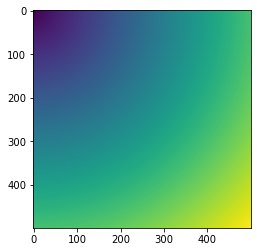

In [34]:
plt.imshow(rad_handler.get_data(dict(epsilon=epsilon, mu=mu, turns=0)))

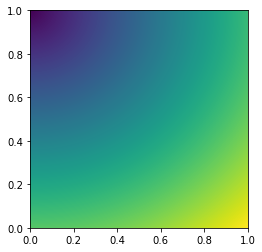

In [35]:
x, px, y, py = raw_rad_handler.get_data(dict(epsilon=epsilon, mu=mu, turns=0))
rad_data = np.sqrt(
    + (x**2 + px**2)
    + (y**2 + py**2)
)
mod_rad_data = np.sqrt(
    + (x**2 + px**2) * (1/0.6)
    + (y**2 + py**2) * (1/0.5)
)

plt.imshow(
    mod_rad_data,
    extent=[0,1,0,1]
)

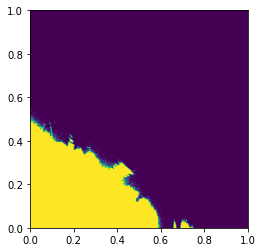

In [36]:
stab_data = stab_handler.get_data(dict(epsilon=epsilon, mu=mu, turns=turns, kick="no_kick"))
plt.imshow(stab_data, extent=[0,1,0,1], origin="lower")

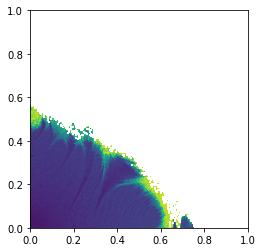

In [128]:
li_data = li_handler.get_data(dict(epsilon=epsilon, mu=mu, turns=turns, displacement="1e-12"))
plt.imshow(li_data, extent=[0,1,0,1], origin="lower")

In [37]:
histo, xnb, ynb = np.histogram2d(
        rad_data.flatten(),
        np.log10(stab_data).flatten(),
        bins=25
)
histo=np.transpose(histo)
histo=np.log10(histo)

<ipython-input-37-8e3d6fb59bee>:7: RuntimeWarning: divide by zero encountered in log10
  histo=np.log10(histo)


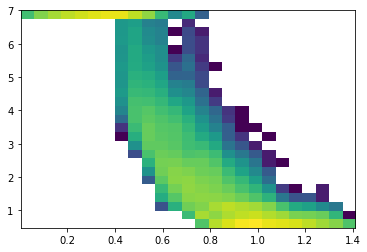

In [38]:
plt.imshow(histo, origin="lower", extent=[xnb[0], xnb[-1], ynb[0], ynb[-1]], aspect="auto")

In [39]:
mod_rad_data = np.sqrt(
    + ((x) * (1/0.6))**2
    + ((y) * (1/0.4))**2
)

In [40]:
histo, xnb, ynb = np.histogram2d(
        mod_rad_data.flatten(),
        np.log10(stab_data).flatten(),
        bins=25
)
histo=np.transpose(histo)
histo=np.log10(histo)

<ipython-input-40-ef5932548364>:7: RuntimeWarning: divide by zero encountered in log10
  histo=np.log10(histo)


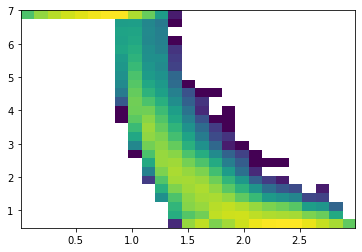

In [41]:
plt.imshow(histo, origin="lower", extent=[xnb[0], xnb[-1], ynb[0], ynb[-1]], aspect="auto")

In [42]:
np.corrcoef(rad_data.flatten(), np.log10(stab_data).flatten())

array([[ 1.        , -0.88089338],
       [-0.88089338,  1.        ]])

In [43]:
np.corrcoef(mod_rad_data.flatten(), np.log10(stab_data).flatten())

array([[ 1.        , -0.87972499],
       [-0.87972499,  1.        ]])

In [44]:
from scipy.optimize import minimize

In [101]:
def mod_rad(x, px, y, py, a, b):
    return np.sqrt(
        + (x.flatten()**2 + px.flatten()**2) / a 
        + (y.flatten()**2 + py.flatten()**2) / b
    )

In [133]:
def random_func(param):
    data = mod_rad(x, px, y, py, param[0], param[1])
    return 1/np.absolute(np.corrcoef(data, np.log10(stab_data).flatten())[0,1])

def li_random_func(param):
    data = mod_rad(x, px, y, py, param[0], param[1])
    bool_mask = np.logical_not(np.isnan(li_data.flatten()))
    return 1/np.absolute(np.corrcoef(data[bool_mask], li_data.flatten()[bool_mask])[0,1])

In [134]:
boh = minimize(
    random_func,
    [1.0, 1.0],
)

In [135]:
li_boh = minimize(
    li_random_func,
    [1.0, 1.0],
)

In [136]:
boh

      fun: 1.1207103886808965
 hess_inv: array([[ 1.55871386, -0.66522999],
       [-0.66522999,  1.77304963]])
      jac: array([ 5.12599945e-06, -6.94394112e-06])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([1.17529191, 0.80809137])

In [137]:
li_boh

      fun: 1.3881417565630216
 hess_inv: array([[ 1.03442126, -0.03914939],
       [-0.03914939,  1.01181865]])
      jac: array([ 4.47034836e-08, -2.53319740e-07])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([1.20256036, 0.78183222])

In [138]:
coso

array([0.00199601, 0.20159681, 0.4011976 , ..., 0.99800399, 0.99800399,
       0.99800399])

In [139]:
histo, xnb, ynb = np.histogram2d(
        rad_data.flatten(),
        np.log10(stab_data).flatten(),
        bins=25
)
histo=np.transpose(histo)
histo=np.log10(histo)

<ipython-input-139-8e3d6fb59bee>:7: RuntimeWarning: divide by zero encountered in log10
  histo=np.log10(histo)


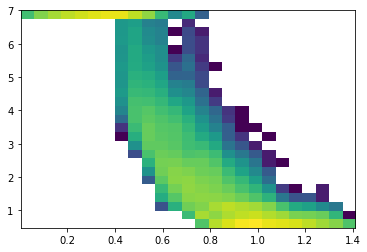

In [140]:
plt.imshow(histo, origin="lower", extent=[xnb[0], xnb[-1], ynb[0], ynb[-1]], aspect="auto")

In [141]:
mod_rad_data = mod_rad(x, px, y, py, boh["x"][0], boh["x"][1])

In [142]:
histo, xnb, ynb = np.histogram2d(
        mod_rad_data.flatten(),
        np.log10(stab_data).flatten(),
        bins=25
)
histo=np.transpose(histo)
histo=np.log10(histo)

<ipython-input-142-ef5932548364>:7: RuntimeWarning: divide by zero encountered in log10
  histo=np.log10(histo)


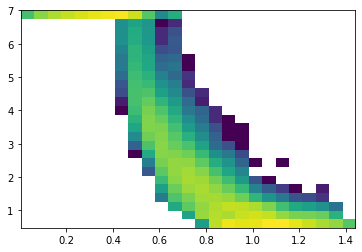

In [143]:
plt.imshow(histo, origin="lower", extent=[xnb[0], xnb[-1], ynb[0], ynb[-1]], aspect="auto")

In [144]:
np.corrcoef(rad_data.flatten(), np.log10(stab_data).flatten())

array([[ 1.        , -0.88089338],
       [-0.88089338,  1.        ]])

In [145]:
np.corrcoef(mod_rad_data.flatten(), np.log10(stab_data).flatten())

array([[ 1.        , -0.89229118],
       [-0.89229118,  1.        ]])

<ipython-input-146-7df3be2d57cc>:5: RuntimeWarning: invalid value encountered in sqrt
  boh["x"][1] * np.sqrt(0.3025 - np.linspace(0,1,10000)**2/boh["x"][0]),
<ipython-input-146-7df3be2d57cc>:10: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(0.3025 - np.linspace(0,1,10000)**2),


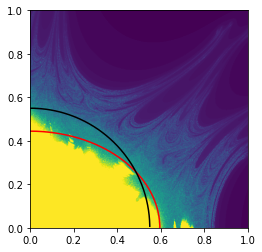

In [146]:
stab_data = stab_handler.get_data(dict(epsilon=epsilon, mu=mu, turns=turns, kick="no_kick"))
plt.imshow(np.log10(stab_data), extent=[0,1,0,1], origin="lower")
plt.plot(
    np.linspace(0,1,10000),
    boh["x"][1] * np.sqrt(0.3025 - np.linspace(0,1,10000)**2/boh["x"][0]),
    color="red"
)
plt.plot(
    np.linspace(0,1,10000),
    np.sqrt(0.3025 - np.linspace(0,1,10000)**2),
    color="black"
)

In [151]:
bool_mask = np.logical_not(np.isnan(li_data.flatten()))
histo, xnb, ynb = np.histogram2d(
        mod_rad_data.flatten()[bool_mask],
        li_data.flatten()[bool_mask],
        bins=25
)
histo=np.transpose(histo)
histo=np.log10(histo)

<ipython-input-151-c08f9e4e78b6>:8: RuntimeWarning: divide by zero encountered in log10
  histo=np.log10(histo)


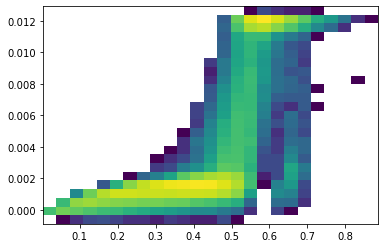

In [152]:
plt.imshow(histo, origin="lower", extent=[xnb[0], xnb[-1], ynb[0], ynb[-1]], aspect="auto")

In [153]:
mod_rad_data = mod_rad(x, px, y, py, li_boh["x"][0], li_boh["x"][1])

In [154]:
histo, xnb, ynb = np.histogram2d(
        mod_rad_data.flatten()[bool_mask],
        li_data.flatten()[bool_mask],
        bins=25
)
histo=np.transpose(histo)
histo=np.log10(histo)

<ipython-input-154-38138f83f24b>:7: RuntimeWarning: divide by zero encountered in log10
  histo=np.log10(histo)


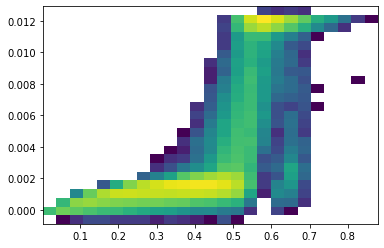

In [155]:
plt.imshow(histo, origin="lower", extent=[xnb[0], xnb[-1], ynb[0], ynb[-1]], aspect="auto")

In [160]:
np.corrcoef(rad_data.flatten()[bool_mask],
        li_data.flatten()[bool_mask],)

array([[1.        , 0.70278114],
       [0.70278114, 1.        ]])

In [161]:
np.corrcoef(mod_rad_data.flatten()[bool_mask],
        li_data.flatten()[bool_mask],)

array([[1.        , 0.72038752],
       [0.72038752, 1.        ]])

<ipython-input-163-37364678d180>:5: RuntimeWarning: invalid value encountered in sqrt
  li_boh["x"][1] * np.sqrt(0.3025 - np.linspace(0,1,10000)**2/li_boh["x"][0]),
<ipython-input-163-37364678d180>:10: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(0.3025 - np.linspace(0,1,10000)**2),


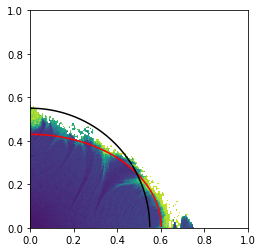

In [163]:
stab_data = stab_handler.get_data(dict(epsilon=epsilon, mu=mu, turns=turns, kick="no_kick"))
plt.imshow(li_data, extent=[0,1,0,1], origin="lower")
plt.plot(
    np.linspace(0,1,10000),
    li_boh["x"][1] * np.sqrt(0.3025 - np.linspace(0,1,10000)**2/li_boh["x"][0]),
    color="red"
)
plt.plot(
    np.linspace(0,1,10000),
    np.sqrt(0.3025 - np.linspace(0,1,10000)**2),
    color="black"
)